<a href="https://colab.research.google.com/github/vladbug/AA-googlecolab/blob/main/LinearRegression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

The goal of this exercise is to implement the linear regression method seen in the course.

Please copy this notebook to your Google account or download it as a Jupyter Notebook.

We start by importing numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Minimize the mean squared error

To generate the data for the exercise, we will use the `scikit-learn` library <https://scikit-learn.org>. It provides a huge selection of already implemented machine learning algorithms for classification, regression or clustering.

If you use Anaconda or Colab, `scikit-learn` should already be installed. Otherwise, install it with `pip` (you may need to restart this notebook afterwards):

```
pip install scikit-learn
```

We will use the method `sklearn.datasets.make_regression` to generate the data. The documentation of this method is available at <https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html>.

The following cell imports the method:

In [2]:
from sklearn.datasets import make_regression

We can now generate the data. We start with the simplest case where the inputs have only one dimension. We will generate 100 samples$(x_i, t_i)$ linked by a linear relationship and some noise.

The following code generates the data:

In [37]:
N = 100
X, t = make_regression(n_samples=N, n_features=1, noise=15)

# A high noise will make the points more disperse and a lower value of noise will make them less disperse
# For instance if we put the noise value ate zero it will generate a line.

`n_samples` is the number of samples generates, `n_features` is the number of input variables and `noise` quantifies how the points deviate from the linear relationship.

**Q:** Print the shape of the arrays `X` and `t` to better understand what is generated. Visualize the dataset using matplotlib (`plt.scatter`). Vary the value of the `noise` argument in the previous cell and visualize the data again.

[[ 1.        ]
 [ 0.63321232]
 [ 0.07260299]
 [ 0.15821547]
 [-0.64743502]
 [-0.59131839]
 [-0.41093834]
 [ 0.05525323]
 [ 1.53232796]
 [ 1.37663909]
 [-1.32826939]
 [-0.81138244]
 [ 0.00755479]
 [ 0.25331357]
 [-1.16631032]
 [-0.61898631]
 [-0.01860299]
 [ 1.03566029]
 [ 0.08670639]
 [-1.38330675]
 [ 0.20720031]
 [ 1.03592676]
 [ 1.37394344]
 [ 0.62455494]
 [-1.01652414]
 [-0.10897933]
 [ 0.47574278]
 [-0.85523823]
 [ 0.87419404]
 [ 1.22108528]
 [-0.80852018]
 [ 0.48683511]
 [ 1.18848488]
 [ 0.30981212]
 [ 0.36816666]
 [-0.79448456]
 [-0.27871978]
 [-1.62250024]
 [ 1.23029124]
 [ 0.62539139]
 [ 1.90344761]
 [-0.64076391]
 [ 0.0605733 ]
 [ 0.85655189]
 [-0.13318117]
 [ 0.05872201]
 [-1.39137408]
 [ 0.84382606]
 [-1.14212106]
 [ 0.64327638]
 [-0.14153917]
 [-1.06108264]
 [ 0.35555003]
 [-0.17948094]
 [-0.48065735]
 [-0.05367162]
 [-0.48894693]
 [ 0.17077291]
 [-0.91286124]
 [ 0.90248388]
 [ 0.41454062]
 [ 0.05939016]
 [ 0.39233745]
 [ 0.82419303]
 [-0.13290596]
 [ 1.96878782]
 [-1.33918

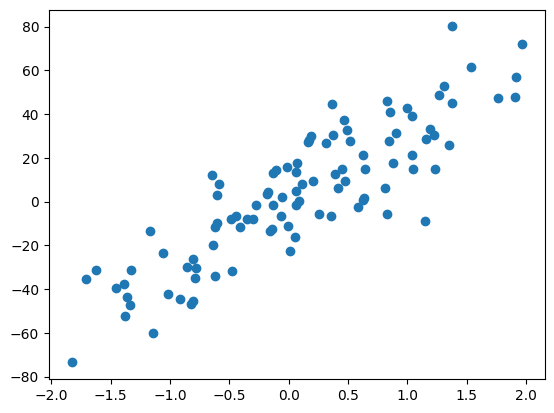

In [49]:
print(X) #feature values
print(len(X[0]))
print(len(X))
print(t) # target values
plt.scatter(X,t)

# t - a simple array
# X - is a matrix with 100 lines and 1 column

Now is the time to solve the Linear Regression problem with numpy.

Remember the problem we need to solve:

$$\mathop{\text{minimize} }_\alpha \|X\alpha - y\|^2$$

where
$X\in \mathbb{R}^{N \times (d+1)}$ is the augmented data matrix such that each line $i$ is $x_i = (x_{i1} \; 1)$, containing the features of example $i$.

**Q:** Create matrix $X$ and vector $y$.

In [57]:
matrix_of_ones = np.ones((X.shape[0], 1)) # matrix filled with ones

augmented_matrix = np.hstack((X, matrix_of_ones)) # let's add to our original matrix the one with ones as a collumn

print(augmented_matrix)

y = t

print(y)


[[ 1.          1.        ]
 [ 0.63321232  1.        ]
 [ 0.07260299  1.        ]
 [ 0.15821547  1.        ]
 [-0.64743502  1.        ]
 [-0.59131839  1.        ]
 [-0.41093834  1.        ]
 [ 0.05525323  1.        ]
 [ 1.53232796  1.        ]
 [ 1.37663909  1.        ]
 [-1.32826939  1.        ]
 [-0.81138244  1.        ]
 [ 0.00755479  1.        ]
 [ 0.25331357  1.        ]
 [-1.16631032  1.        ]
 [-0.61898631  1.        ]
 [-0.01860299  1.        ]
 [ 1.03566029  1.        ]
 [ 0.08670639  1.        ]
 [-1.38330675  1.        ]
 [ 0.20720031  1.        ]
 [ 1.03592676  1.        ]
 [ 1.37394344  1.        ]
 [ 0.62455494  1.        ]
 [-1.01652414  1.        ]
 [-0.10897933  1.        ]
 [ 0.47574278  1.        ]
 [-0.85523823  1.        ]
 [ 0.87419404  1.        ]
 [ 1.22108528  1.        ]
 [-0.80852018  1.        ]
 [ 0.48683511  1.        ]
 [ 1.18848488  1.        ]
 [ 0.30981212  1.        ]
 [ 0.36816666  1.        ]
 [-0.79448456  1.        ]
 [-0.27871978  1.        ]
 


**Q:** Identify the optimization variable of the problem.

This is a (convex) quadratic problem. To solve it, we simply differentiate it, obtaining the gradient, and equate the gradient to zero, obtaining

$$ X^T(X\alpha-y)=0.$$

By solving this equation with respect to $w$ we get
$$\alpha = (X^TX)^{-1} X^Ty.$$

In Numpy, check how to do matrix multiplication and how to compute the inverse of a matrix. Read the documentation of [pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html), [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) and [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) to start.


**Q:** Using the above identity, compute the regression weights $\alpha$.



In [85]:
X_transposed = augmented_matrix.T
#print(X_transposed)

XTX = np.dot(X_transposed,augmented_matrix)
print(XTX)

XTy = np.dot(X_transposed,y)
print(XTy)

XTX_inv = np.linalg.inv(XTX)
print(XTX_inv)

right_most = np.matmul(X_transposed,y)
left_most = np.matmul(X_transposed,augmented_matrix)
left_most = np.linalg.inv(left_most)

alpha = np.matmul(left_most,right_most)

#alpha = np.dot()

print(alpha)


[[ 79.97125357   9.13529132]
 [  9.13529132 100.        ]]
[2401.44151391  375.63624009]
[[ 0.01263636 -0.00115437]
 [-0.00115437  0.01010545]]
[29.91185515  1.02382729]


**Q:** Visualize the quality of the fit by superposing the learned model to the data with matplotlib.

*Tip*: you can get the extreme values of the xaxis with `X.min()` and `X.max()`. To visualize the model, you just need to plot a line between the points `(X.min(), a[0]*X.min()+a[1])` and `(X.max(), a[0]*X.max()+a[1])`.

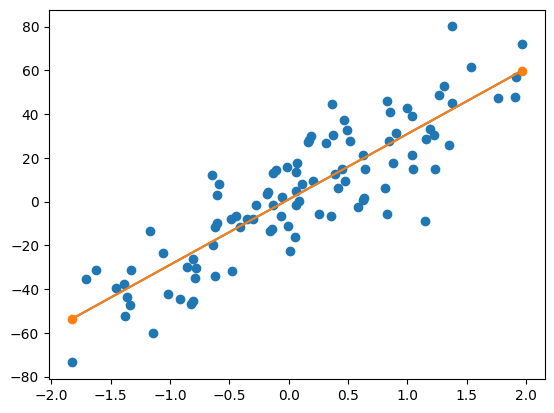

' \nCertainly, let me explain why the two points `([y_min, y_min], [y_max, y_max])` work for plotting the ideal relationship line `y = x`:\n\n1. `([y_min, y_min])`: These are the x-coordinates for the line. Both x-coordinates are set to the minimum actual value, `y_min`. \n\n2. `([y_max, y_max])`: These are the y-coordinates for the line. Both y-coordinates are set to the maximum actual value, `y_max`.\n\nThe reason these points work is because they create a diagonal line with a slope of 1 (45-degree angle) that passes through the origin (0, 0). Here\'s why:\n\n- `([y_min, y_min], [y_max, y_max])` represents a line where the x-coordinate and y-coordinate are always equal to each other. In other words, for any value `x`, the corresponding value of `y` is the same. This is precisely what `y = x` represents, where the values of `y` and `x` are identical.\n\n- The line `[y_min, y_min]` to `[y_max, y_max]` starts at the point `(y_min, y_min)` and ends at the point `(y_max, y_max)`. This lin

In [102]:
# alpha da-nos os coeficientes a serem usados na nossa função y = ax + b

# Create a linear function using the minimum and maximum x-values
x_min = X.min()
x_max = X.max()
y_min = alpha[0] * x_min + alpha[1]
y_max = alpha[0] * x_max + alpha[1]

# Create linear x and y values for the line
linear_x = np.array([x_min, x_max])
linear_y = np.array([y_min, y_max])

X_reg = np.linspace(augmented_matrix[:,0].min(),augmented_matrix[:,0].max(),300)

Y_reg = np.polyval(alpha,X_reg)

plt.figure()
plt.scatter(X,t)
plt.plot(X_reg,Y_reg)
plt.plot(linear_x,linear_y, marker='o', linestyle='-')
plt.show()
plt.close()


Another option is to predict a value for all inputs and plot this vector $\hat{y}$ against the desired values $y$.

**Q:** Make a scatter plot where $y$ is the x-axis and $\hat{y} = \alpha[0]\, x + \alpha[1]$ is the y-axis. How should the points be arranged in the ideal case? Also plot what this ideal relationship should be.

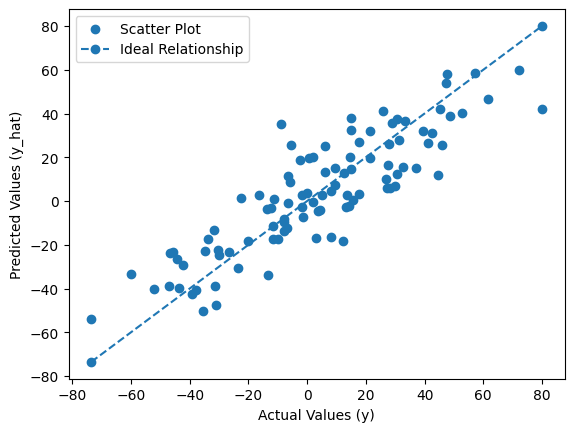

' \nCertainly, let me explain why the two points `([y_min, y_min], [y_max, y_max])` work for plotting the ideal relationship line `y = x`:\n\n1. `([y_min, y_min])`: These are the x-coordinates for the line. Both x-coordinates are set to the minimum actual value, `y_min`. \n\n2. `([y_max, y_max])`: These are the y-coordinates for the line. Both y-coordinates are set to the maximum actual value, `y_max`.\n\nThe reason these points work is because they create a diagonal line with a slope of 1 (45-degree angle) that passes through the origin (0, 0). Here\'s why:\n\n- `([y_min, y_min], [y_max, y_max])` represents a line where the x-coordinate and y-coordinate are always equal to each other. In other words, for any value `x`, the corresponding value of `y` is the same. This is precisely what `y = x` represents, where the values of `y` and `x` are identical.\n\n- The line `[y_min, y_min]` to `[y_max, y_max]` starts at the point `(y_min, y_min)` and ends at the point `(y_max, y_max)`. This lin

In [103]:
y_hat = alpha[0] * X + alpha[1]

plt.figure()
plt.scatter(y, y_hat, label='Scatter Plot')

# Plot the ideal relationship line (y = y_hat)
plt.plot([y.min(), y.max()], [y.min(), y.max()], marker='o', label='Ideal Relationship', linestyle='--')

plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_hat)')
plt.legend()
plt.show()



'''
Certainly, let me explain why the two points `([y_min, y_min], [y_max, y_max])` work for plotting the ideal relationship line `y = x`:

1. `([y_min, y_min])`: These are the x-coordinates for the line. Both x-coordinates are set to the minimum actual value, `y_min`.

2. `([y_max, y_max])`: These are the y-coordinates for the line. Both y-coordinates are set to the maximum actual value, `y_max`.

The reason these points work is because they create a diagonal line with a slope of 1 (45-degree angle) that passes through the origin (0, 0). Here's why:

- `([y_min, y_min], [y_max, y_max])` represents a line where the x-coordinate and y-coordinate are always equal to each other. In other words, for any value `x`, the corresponding value of `y` is the same. This is precisely what `y = x` represents, where the values of `y` and `x` are identical.

- The line `[y_min, y_min]` to `[y_max, y_max]` starts at the point `(y_min, y_min)` and ends at the point `(y_max, y_max)`. This line represents a perfect one-to-one relationship between the actual values (`y`) and the predicted values (`y_hat`). In an ideal scenario, the predicted values should match the actual values perfectly, which is why this line is considered the "ideal relationship."

- This diagonal line ensures that, for any value on the x-axis (actual values), the corresponding value on the y-axis (predicted values) is the same. This is the essence of a perfect prediction, where every point on the line represents a case where the predicted value equals the actual value.

In summary, these two points and the resulting line `[y_min, y_min]` to `[y_max, y_max]` represent the ideal scenario where the predicted values (`y_hat`) perfectly match the actual values (`y`) for all data points, forming a diagonal line with a slope of 1.

'''



## Scikit-learn

The code that you have written is functional, but extremely slow, as you use for loops in Python. For so little data samples, it does not make a difference, but if you had millions of samples, this would start to be a problem.

The solution is to use optimized implementations of the algorithms, running in C++ or FORTRAN under the hood. We will use here the LMS algorithm provided by `scikit-learn` as you have already installed it and it is very simple to use. Note that one could use tensorflow too, but that would be killing a fly with a sledgehammer.

`scikit-learn` provides a `LinearRegression` object that implements the training procedure above. The documentation is at: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>.

You simply import it with:

```python
from sklearn.linear_model import LinearRegression
```

You create the object with:

```python
reg = LinearRegression()
```

`reg` is now an object with different methods (`fit()`, `predict()`) that accept any kind of data and performs linear regression.

To train the model on the data $(X, y)$, simply use:

```python
reg.fit(X, y)
```

The parameters of the model are obtained with `reg.coef_` for $w[0]$ and `reg.intercept_` for $w[1]$.

You can predict outputs for new inputs using:

```python
y = reg.predict(X)
```

**Q:** Apply linear regression on the data using `scikit-learn`. Check the model parameters after learning and compare them to what you obtained previously. Print the mse and make a plot comparing the predictions with the data.